## Creating Negative Binding Pairs for Final Dataset
The constructed dataset so far only contains the positive training examples. This notebook creates the negative binding pairs needed to train the model. A small section also explores the distribution of protein interactions. The set of proteins with the highest number of interactions was noted in order to possibly exclude them if the model ends up showing evidence of bias favoring predictions with these proteins.

In [5]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.utils import shuffle

## Positive Binding Pairs:

In [6]:
# open pc_binding: 3.2 mil CIDm-protein binding pairs that meet exp. threshold >= 200
pc_binding = pd.read_csv('pc_binding.tsv', sep='\t')

In [4]:
pc_binding.head(5)

,chemical,protein,experimental
0,CIDm00000007,9606.ENSP00000335153,800
1,CIDm00000009,9606.ENSP00000430236,509
2,CIDm00000009,9606.ENSP00000262374,509
3,CIDm00000009,9606.ENSP00000408526,837
4,CIDm00000009,9606.ENSP00000269159,210


In [5]:
pc_binding = pc_binding.drop(columns = 'experimental')
pc_binding['binding'] = 1

In [5]:
pc_binding.head(5)

,chemical,protein,binding
0,CIDm00000007,9606.ENSP00000335153,1
1,CIDm00000009,9606.ENSP00000430236,1
2,CIDm00000009,9606.ENSP00000262374,1
3,CIDm00000009,9606.ENSP00000408526,1
4,CIDm00000009,9606.ENSP00000269159,1


In [6]:
len(pc_binding)

3222208

In [7]:
pc_binding.to_csv('positivePairs.tsv', sep='\t')

## Negative Binding Pairs:

### Get Protein Interactions:

In [7]:
binding = pc_binding.sort_values('protein').reset_index(drop=True)

In [8]:
binding.head()

,chemical,protein,experimental
0,CIDm00000730,9606.ENSP00000000233,829
1,CIDm00188347,9606.ENSP00000000233,675
2,CIDm00001764,9606.ENSP00000000233,322
3,CIDm00031275,9606.ENSP00000000233,675
4,CIDm00000174,9606.ENSP00000000233,675


In [9]:
proteins = binding[['protein']].copy()

In [9]:
proteins = proteins.drop_duplicates(keep='first')

In [10]:
proteins = proteins.reset_index()

In [12]:
proteins.head(10)

,index,protein
0,0,9606.ENSP00000000233
1,26,9606.ENSP00000000412
2,37,9606.ENSP00000000442
3,916,9606.ENSP00000001008
4,954,9606.ENSP00000001146
5,1265,9606.ENSP00000002125
6,1266,9606.ENSP00000002165
7,1326,9606.ENSP00000002596
8,1332,9606.ENSP00000002829
9,1337,9606.ENSP00000003084


In [13]:
proteins.tail()

,index,protein
9910,3221554,9606.ENSP00000473047
9911,3222181,9606.ENSP00000473166
9912,3222191,9606.ENSP00000473172
9913,3222194,9606.ENSP00000473233
9914,3222198,9606.ENSP00000473243


In [14]:
interactions = pd.DataFrame()
interactions = pd.concat([interactions, proteins['protein']], axis=1) 
numChem = []

for i in range(0, 9915):
    if (i == 9914):
        numChem.append(len(pc_binding) - proteins['index'][i])
    else:
        numChem.append(proteins['index'][i+1] - proteins['index'][i])

numChem = pd.Series(numChem)
interactions['interactions'] = numChem.values

In [15]:
interactions

,protein,interactions
0,9606.ENSP00000000233,26
1,9606.ENSP00000000412,11
2,9606.ENSP00000000442,879
3,9606.ENSP00000001008,38
4,9606.ENSP00000001146,311
5,9606.ENSP00000002125,1
6,9606.ENSP00000002165,60
7,9606.ENSP00000002596,6
8,9606.ENSP00000002829,5
9,9606.ENSP00000003084,130


In [16]:
interactions.describe()

,interactions
count,9915.000000
mean,324.983157
std,1836.755945
min,1.000000
25%,4.000000
50%,10.000000
75%,34.000000
max,16714.000000


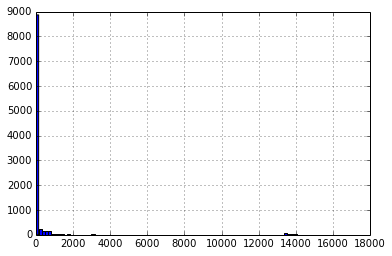

In [17]:
%matplotlib inline
hist_plot = interactions.interactions.hist(bins=100)


In [20]:
highinteractions = interactions[interactions.interactions > 10000]

In [4]:
pd.set_option('display.max_rows', 500)

In [30]:
highinteractions[['protein']]

,protein
123,9606.ENSP00000176183
274,9606.ENSP00000216629
305,9606.ENSP00000217270
338,9606.ENSP00000218721
569,9606.ENSP00000226413
647,9606.ENSP00000229955
760,9606.ENSP00000234371
773,9606.ENSP00000234961
821,9606.ENSP00000239032
860,9606.ENSP00000241256


In [31]:
len(highinteractions)

172

### Get Negative Pairs:

In [10]:
binding = pc_binding.sort_values('protein').reset_index(drop=True)

In [11]:
binding.head() 

,chemical,protein,experimental
0,CIDm00000730,9606.ENSP00000000233,829
1,CIDm00188347,9606.ENSP00000000233,675
2,CIDm00001764,9606.ENSP00000000233,322
3,CIDm00031275,9606.ENSP00000000233,675
4,CIDm00000174,9606.ENSP00000000233,675


In [12]:
proteins = binding[['protein']].copy().drop_duplicates().reset_index(drop=True) #now list of unique binding proteins

In [13]:
proteins

,protein
0,9606.ENSP00000000233
1,9606.ENSP00000000412
2,9606.ENSP00000000442
3,9606.ENSP00000001008
4,9606.ENSP00000001146
5,9606.ENSP00000002125
6,9606.ENSP00000002165
7,9606.ENSP00000002596
8,9606.ENSP00000002829
9,9606.ENSP00000003084


In [14]:
len(proteins) #verified 

9915

In [66]:
randMasterChemicals = set(binding['chemical'].copy().drop_duplicates().sample(n=10000).reset_index(drop=True))
randMasterChemicals

{'CIDm44360844',
 'CIDm44293685',
 'CIDm10459378',
 'CIDm23567283',
 'CIDm57402839',
 'CIDm11583193',
 'CIDm10105934',
 'CIDm44293178',
 'CIDm71659358',
 'CIDm72793822',
 'CIDm44427506',
 'CIDm71560812',
 'CIDm49782569',
 'CIDm05329842',
 'CIDm59225642',
 'CIDm09836100',
 'CIDm10672718',
 'CIDm10619108',
 'CIDm02217156',
 'CIDm23581649',
 'CIDm24950710',
 'CIDm72705641',
 'CIDm57341135',
 'CIDm11294476',
 'CIDm11604603',
 'CIDm10296143',
 'CIDm76310375',
 'CIDm56661751',
 'CIDm10649481',
 'CIDm70688018',
 'CIDm13525045',
 'CIDm10333656',
 'CIDm11810932',
 'CIDm44452331',
 'CIDm52919413',
 'CIDm16735073',
 'CIDm10936584',
 'CIDm52941283',
 'CIDm05249489',
 'CIDm44389385',
 'CIDm11962098',
 'CIDm11962093',
 'CIDm22055240',
 'CIDm24873286',
 'CIDm09973005',
 'CIDm11350445',
 'CIDm00478413',
 'CIDm15717139',
 'CIDm10713238',
 'CIDm11271934',
 'CIDm44288584',
 'CIDm53319170',
 'CIDm44292228',
 'CIDm44299236',
 'CIDm44203644',
 'CIDm01474860',
 'CIDm44378836',
 'CIDm44579668',
 'CIDm71624269

In [16]:
len(randMasterChemicals) #verified

10000

In [65]:
import random
randSet = range(0, 9915)
random.shuffle(randSet)
print randSet

[7695, 5528, 8325, 2549, 8328, 4488, 8003, 7467, 8475, 2182, 7498, 1579, 1643, 4045, 1609, 7931, 1665, 9055, 3602, 3147, 5740, 4763, 243, 9076, 2323, 947, 3512, 1353, 5097, 9532, 7497, 3596, 4683, 4360, 4697, 368, 5328, 5467, 23, 3626, 5767, 5468, 5831, 3110, 4292, 8990, 6259, 1428, 9048, 2687, 3568, 5397, 1610, 7029, 3020, 440, 6824, 9789, 6730, 855, 369, 8654, 733, 4899, 5285, 4147, 8156, 2072, 9178, 9883, 6385, 8955, 4471, 8843, 3433, 4482, 4769, 6052, 6364, 7191, 8759, 1104, 6482, 5481, 3038, 8273, 6097, 4554, 8844, 7380, 4551, 1912, 8394, 8415, 1849, 72, 1929, 7065, 7707, 2577, 1684, 8327, 7983, 3205, 9529, 9687, 1396, 7933, 91, 225, 6805, 7257, 2258, 5703, 6744, 6700, 6344, 2747, 6572, 8180, 6631, 2643, 2781, 6813, 3289, 9520, 5326, 7747, 7281, 7264, 6117, 9751, 8370, 8987, 1577, 5849, 6014, 7442, 674, 3652, 6426, 197, 3996, 7174, 8787, 6658, 3585, 1817, 112, 3479, 4105, 9186, 3229, 464, 6534, 1984, 53, 6412, 7155, 4743, 9261, 9075, 7161, 6672, 3062, 9064, 9365, 8431, 5647, 5699,

In [18]:
len(randSet)

9915

In [101]:
negativePairs = pd.DataFrame()
randProteins = []
negChemicals = [] 
i = 0

while (len(negChemicals) < 3222209):
    randInt = randSet[i]
    randProtein = proteins.iloc[randInt][0]
        
    temp = binding.loc[binding['protein'] == randProtein].reset_index(drop=True)
    randChemicals = set(temp['chemical'])
        
    randTemp = randMasterChemicals - randChemicals
        
    negChemicals.extend(random.sample(randTemp, int(len(randTemp)*.75)))
    nc = random.sample(randTemp, int(len(randTemp)*.75))
    
    randProteins += [randProtein] * (len(nc))
    rps = [randProtein] * (len(nc))
    
    tempPairs = pd.DataFrame()
    tempRandProteins = pd.Series(rps)
    tempNegChemicals = pd.Series(nc)
    tempPairs['chemical'] = tempNegChemicals
    tempPairs['protein'] = tempRandProteins
    if (tempPairs.duplicated().any() == True):
        print i
        break

    i += 1
    print len(negChemicals) 

7488
14987
22485
29985
37485
44985
52484
59984
67484
74984
82484
89984
97484
104980
112480
119959
127457
134957
142457
149543
157037
164519
172019
179518
187018
194514
202014
209514
217008
224508
232008
239508
247008
254481
261980
269478
276978
284478
291978
299072
306570
314070
321567
329061
336561
344061
351561
359061
366559
374055
381555
389052
396551
404050
411550
419050
426550
434050
441550
449050
456550
464050
471550
479050
486550
494050
501548
509048
516543
524043
531543
539043
546543
554040
561540
569040
576540
584040
591540
599037
606537
614037
621537
629037
636537
644037
651531
659031
666531
674031
681531
689031
696531
704028
711527
719027
726527
734027
741527
749027
756527
764027
771527
779027
786527
794027
801525
809025
816525
824025
831525
838984
846484
853984
861469
868968
876468
883968
891468
898968
906467
913966
921466
928560
936060
943560
951060
958560
966060
973559
981059
988559
996059
1003559
1011059
1018559
1026059
1033559
1041059
1048559
1056059
1063559
1071040
107

In [109]:
randProteins = pd.Series(randProteins)
negChemicals = pd.Series(negChemicals)
negativePairs['chemical'] = negChemicals
negativePairs['protein'] = randProteins

In [111]:
negativePairs.duplicated().any()

False

In [112]:
negativePairs.to_csv('negativePairs.tsv', sep='\t')

In [113]:
len(negativePairs)

3229012